# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [9]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 60
page_size = 300

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 300 total reviews
Scraping page 2
   ---> 600 total reviews
Scraping page 3
   ---> 900 total reviews
Scraping page 4
   ---> 1200 total reviews
Scraping page 5
   ---> 1500 total reviews
Scraping page 6
   ---> 1800 total reviews
Scraping page 7
   ---> 2100 total reviews
Scraping page 8
   ---> 2400 total reviews
Scraping page 9
   ---> 2700 total reviews
Scraping page 10
   ---> 3000 total reviews
Scraping page 11
   ---> 3300 total reviews
Scraping page 12
   ---> 3600 total reviews
Scraping page 13
   ---> 3900 total reviews
Scraping page 14
   ---> 3917 total reviews
Scraping page 15
   ---> 3917 total reviews
Scraping page 16
   ---> 3917 total reviews
Scraping page 17
   ---> 3917 total reviews
Scraping page 18
   ---> 3917 total reviews
Scraping page 19
   ---> 3917 total reviews
Scraping page 20
   ---> 3917 total reviews
Scraping page 21
   ---> 3917 total reviews
Scraping page 22
   ---> 3917 total reviews
Scraping page 23
   ---> 3917 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Prior to boarding a gate a...
1,✅ Trip Verified | I flew from Amsterdam to L...
2,"✅ Trip Verified | First the good news, the clu..."
3,✅ Trip Verified | I have never travelled wit...
4,"✅ Trip Verified | Terrible overall, medium ser..."


In [8]:
# Check the number of rows and columns
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 3917
Number of columns: 2


In [5]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [10]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('data/BA_reviews.csv')

# Display the first few rows to verify
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Prior to boarding a gate a...
1,1,✅ Trip Verified | I flew from Amsterdam to L...
2,2,"✅ Trip Verified | First the good news, the clu..."
3,3,✅ Trip Verified | I have never travelled wit...
4,4,"✅ Trip Verified | Terrible overall, medium ser..."


In [11]:
# Remove "✅ Trip Verified" and "Not Verified" from the reviews
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified | ', '', regex=False)
df['reviews'] = df['reviews'].str.replace('Not Verified | ', '', regex=False)

# Remove leading/trailing whitespace
df['reviews'] = df['reviews'].str.strip()

# Remove special characters (optional)
df['reviews'] = df['reviews'].str.replace(r'[^\w\s]', '', regex=True)

# Convert to lowercase (optional)
df['reviews'] = df['reviews'].str.lower()

# Check for duplicates and remove them
df.drop_duplicates(inplace=True)

# Save the cleaned data to a new CSV file
df.to_csv('data/cleaned_BA_reviews.csv', index=False)

In [10]:
# Display the first 5 rows of the cleaned DataFrame
df.head()

,Unnamed: 0,reviews
0,0,prior to boarding a gate agent seemed to pick ...
1,1,i flew from amsterdam to las vegas with a layo...
2,2,first the good news the club suites are such a...
3,3,i have never travelled with british airways be...
4,4,terrible overall medium service and the flight...


In [12]:
import matplotlib.pyplot as plt
print("Matplotlib imported successfully!")

Matplotlib imported successfully!


----------------Dataframe Overview----------------
Total Number of Reviews: 3,917
Number of Columns: 2
Column Names: Unnamed: 0, reviews
--------------------------------------------------
---------------Missing Values Check---------------
No missing values detected in the dataset.
--------------------------------------------------
--------------Word Count Statistics---------------
Average Word Count: 161.22 words
Minimum Word Count: 15
Maximum Word Count: 655
--------------------------------------------------


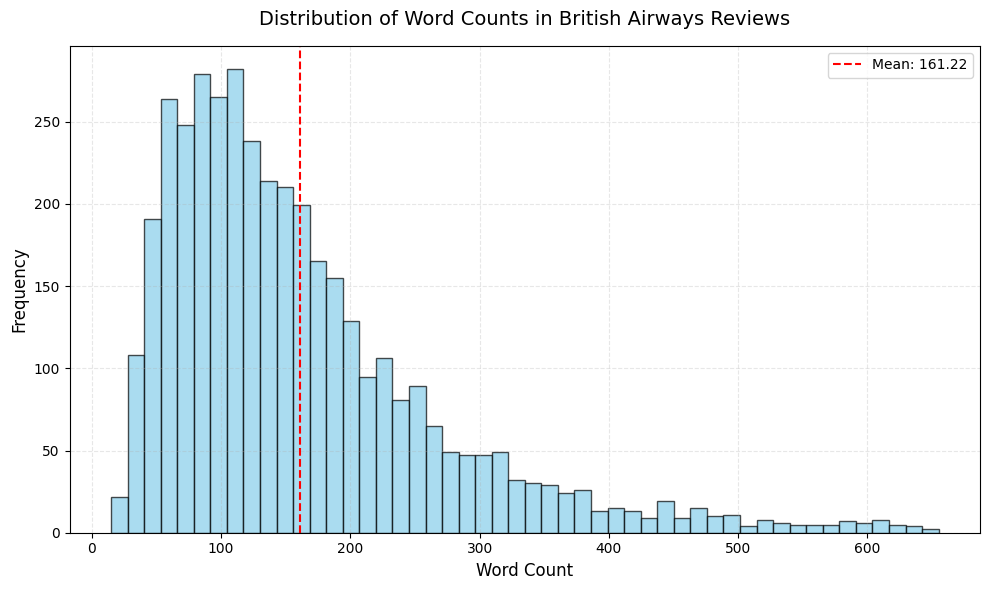

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------------------------
# Dataframe Structure and Integrity Analysis
# -----------------------------------------------

# Display the total number of reviews (rows) in a formatted manner
total_reviews = len(df)
print("Dataframe Overview".center(50, "-"))
print(f"Total Number of Reviews: {total_reviews:,}")
print(f"Number of Columns: {df.shape[1]}")
print(f"Column Names: {', '.join(df.columns.tolist())}")
print("-" * 50)

# Check and report missing values for each column
print("Missing Values Check".center(50, "-"))
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values detected in the dataset.")
else:
    print("Missing Values per Column:")
    print(missing_values[missing_values > 0].to_string())
print("-" * 50)

# -----------------------------------------------
# Word Count Distribution Analysis
# -----------------------------------------------

# Calculate word count for each review
df['word_count'] = df['reviews'].apply(lambda x: len(str(x).split()))
avg_word_count = df['word_count'].mean()

# Display word count statistics
print("Word Count Statistics".center(50, "-"))
print(f"Average Word Count: {avg_word_count:.2f} words")
print(f"Minimum Word Count: {df['word_count'].min():,}")
print(f"Maximum Word Count: {df['word_count'].max():,}")
print("-" * 50)

# -----------------------------------------------
# Visualization of Word Count Distribution
# -----------------------------------------------

# Configure professional plot styling
plt.figure(figsize=(10, 6), dpi=100)
plt.hist(df['word_count'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Add titles and labels with proper formatting
plt.title('Distribution of Word Counts in British Airways Reviews', fontsize=14, pad=15)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customize grid and ticks for clarity
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a vertical line for the mean
plt.axvline(avg_word_count, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {avg_word_count:.2f}')
plt.legend(fontsize=10)

# Ensure layout fits well
plt.tight_layout()

# Display the plot
plt.show()

-----------------Sentiment Analysis Summary-----------------
Category        |    Count |   Percentage
------------------------------------------------------------
Positive        |    2,707 |      69.11%
Negative        |    1,190 |      30.38%
Neutral         |       20 |       0.51%
------------------------------------------------------------
Total Reviews Analyzed: 3,917
------------------------------------------------------------


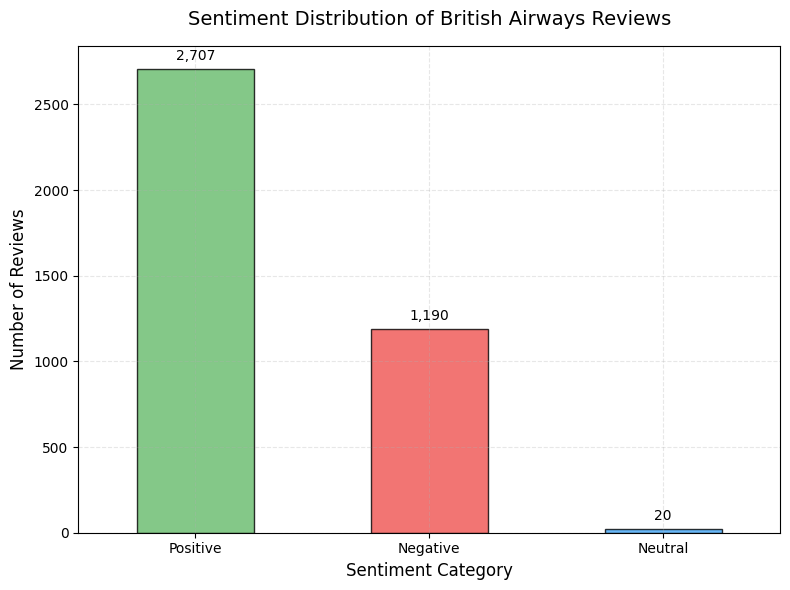

In [14]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------------------------
# Sentiment Analysis of British Airways Reviews
# -----------------------------------------------

# Calculate sentiment polarity for each review
df['sentiment'] = df['reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Classify sentiment into positive, negative, or neutral categories
df['sentiment_label'] = df['sentiment'].apply(
    lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral'
)

# -----------------------------------------------
# Sentiment Distribution Summary
# -----------------------------------------------

# Compute the count of each sentiment category
sentiment_counts = df['sentiment_label'].value_counts()

# Display sentiment distribution in a formatted table-like output
print("Sentiment Analysis Summary".center(60, "-"))
print(f"{'Category':<15} | {'Count':>8} | {'Percentage':>12}")
print("-" * 60)
total_reviews = len(df)
for label, count in sentiment_counts.items():
    percentage = (count / total_reviews) * 100
    print(f"{label:<15} | {count:>8,} | {percentage:>10.2f}%")
print("-" * 60)
print(f"Total Reviews Analyzed: {total_reviews:,}")
print("-" * 60)

# -----------------------------------------------
# Visualization of Sentiment Distribution
# -----------------------------------------------

# Configure professional plot styling
plt.figure(figsize=(8, 6), dpi=100)
sentiment_counts.plot(kind='bar', color=['#66BB6A', '#EF5350', '#42A5F5'], edgecolor='black', alpha=0.8)

# Add titles and labels with proper formatting
plt.title('Sentiment Distribution of British Airways Reviews', fontsize=14, pad=15)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Customize ticks, grid, and layout
plt.xticks(rotation=0, fontsize=10)  # Horizontal labels for readability
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)

# Add value labels on top of bars for clarity
for i, count in enumerate(sentiment_counts):
    plt.text(i, count + 0.02 * max(sentiment_counts), f'{count:,}', ha='center', fontsize=10)

# Ensure layout fits well
plt.tight_layout()

# Display the plot
plt.show()

In [22]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gauth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
import pandas as pd

# Load the cleaned data
df = pd.read_csv('data/cleaned_BA_reviews.csv')

# Summary of cleaning
print("Data Cleaning Validation".center(60, "-"))
print(f"Original number of reviews: {len(pd.read_csv('data/BA_reviews.csv'))}")
print(f"Number of reviews after cleaning: {len(df)}")
print(f"Number of duplicates removed: {len(pd.read_csv('data/BA_reviews.csv')) - len(df)}")
print(f"Missing values in 'reviews' column: {df['reviews'].isnull().sum()}")
print("-" * 60)

# Preview cleaned data
print("Sample of Cleaned Reviews".center(60, "-"))
print(df['reviews'].head().to_string(index=False))
print("-" * 60)

------------------Data Cleaning Validation------------------
Original number of reviews: 3917
Number of reviews after cleaning: 3917
Number of duplicates removed: 0
Missing values in 'reviews' column: 0
------------------------------------------------------------
-----------------Sample of Cleaned Reviews------------------
prior to boarding a gate agent seemed to pick o...
i flew from amsterdam to las vegas with a layov...
first the good news the club suites are such a ...
i have never travelled with british airways bef...
terrible overall medium service and the flight ...
------------------------------------------------------------


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gauth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gauth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


-----------------Top 10 Most Frequent Words-----------------
Word            |  Frequency
------------------------------------------------------------
flight          |       7111
ba              |       4858
service         |       2992
seat            |       2469
food            |       2434
british         |       2286
crew            |       2278
airways         |       2254
london          |       2252
seats           |       2190
------------------------------------------------------------


C:\Users\gauth\AppData\Local\Temp\ipykernel_4676\407583766.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="magma", edgecolor='black')


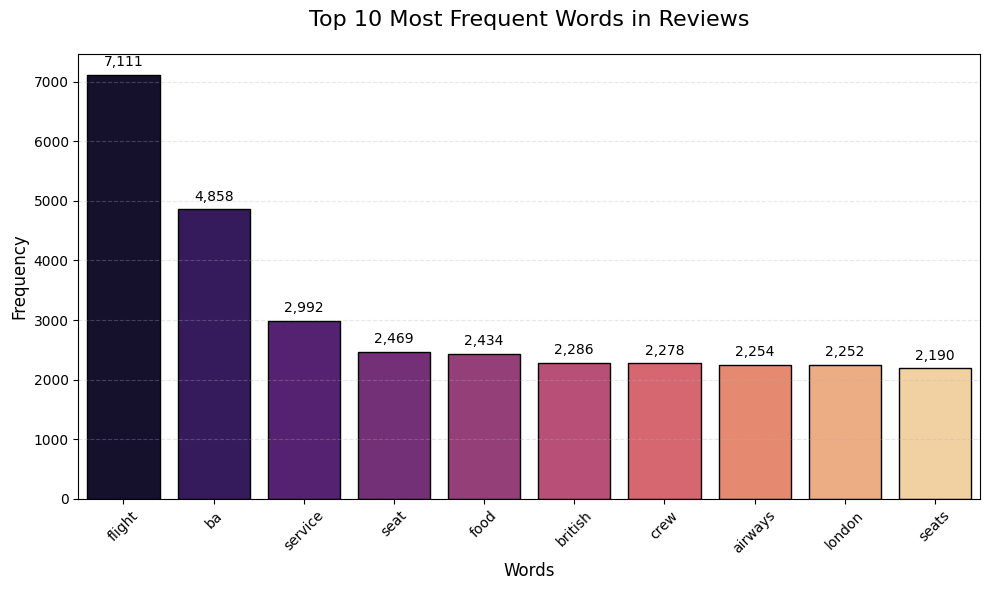

In [25]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Ensure NLTK resources are downloaded
nltk.download('punkt_tab')
nltk.download('stopwords')

# Tokenize and preprocess reviews
stop_words = set(stopwords.words('english'))
tokenized_reviews = [word_tokenize(str(review).lower()) for review in df['reviews']]
cleaned_tokens = [word for review in tokenized_reviews for word in review if word.isalpha() and word not in stop_words]

# Calculate word frequencies
word_freq = Counter(cleaned_tokens).most_common(10)

# Display results
print("Top 10 Most Frequent Words".center(60, "-"))
print(f"{'Word':<15} | {'Frequency':>10}")
print("-" * 60)
for word, freq in word_freq:
    print(f"{word:<15} | {freq:>10}")
print("-" * 60)

# Bar plot for word frequency
plt.figure(figsize=(10, 6), dpi=100)
words, counts = zip(*word_freq)
sns.barplot(x=list(words), y=list(counts), palette="magma", edgecolor='black')
plt.title('Top 10 Most Frequent Words in Reviews', fontsize=16, pad=20)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
for i, count in enumerate(counts):
    plt.text(i, count + 0.02 * max(counts), f'{count:,}', ha='center', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

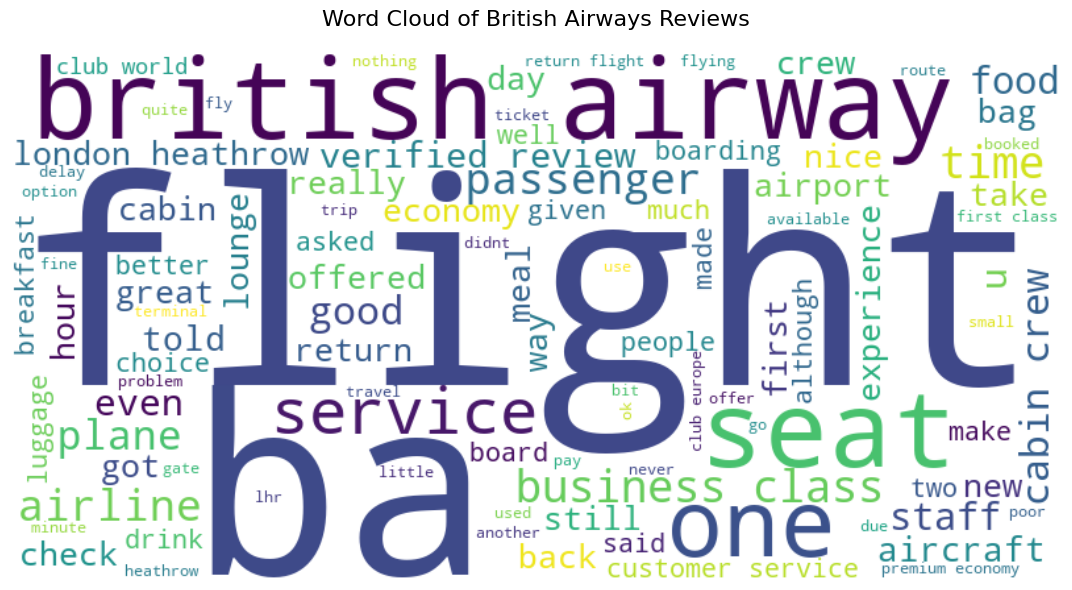

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', 
                      max_words=100, min_font_size=10).generate(' '.join(cleaned_tokens))

# Display word cloud
plt.figure(figsize=(12, 6), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of British Airways Reviews', fontsize=16, pad=20)
plt.tight_layout()
plt.show()